In [1]:
%matplotlib inline
import numpy as np
from sklearn.calibration import calibration_curve
from matplotlib import pyplot as plt
import pickle

import torch
from torch import nn
from torch.autograd import Variable

from model import Model
import utils

np.random.seed(42)

# Training Models

Run the following commands:

`python train_model.py --gpu_id 0 --mode dropout --model_id 0 --dprob 0.0`

`python train_model.py --gpu_id 0 --mode dropout --model_id 1 --dprob 0.1`

`python train_model.py --gpu_id 0 --mode dropout --model_id 2 --dprob 0.2`

`python train_model.py --gpu_id 0 --mode dropout --model_id 3 --dprob 0.3`

`python train_model.py --gpu_id 0 --mode dropout --model_id 4 --dprob 0.4`

`python train_model.py --gpu_id 0 --mode concrete --model_id 5 --dr 0.0001`

`python train_model.py --gpu_id 0 --mode concrete --model_id 6 --dr 1.0`

`python train_model.py --gpu_id 0 --mode concrete --model_id 7 --dr 100.0`

# Dropout Rate Convergence

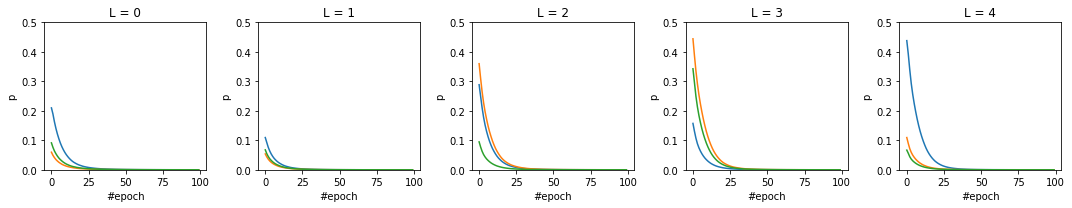

In [9]:
plt.figure(figsize=(15, 3))

for index in range(5):

    plt.subplot(1, 5, index + 1)

    for training_data in cdropout_training_datas:

        convergence = [x[5][index] for x in training_data]

        plt.plot(convergence)
        plt.title('L = {}'.format(index))
        plt.xlabel('#epoch')
        plt.ylim([0, 0.5])
        plt.ylabel('p')

plt.tight_layout()
        
plt.show()

# Learning Curves

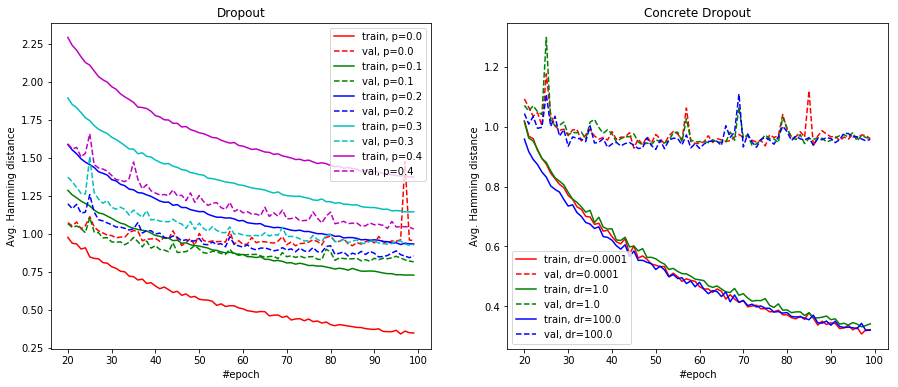

In [17]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)

for model, training_data, dropout_prob, color in zip(dropout_models, dropout_training_datas,
                                                     dropout_probs, ['r', 'g', 'b', 'c', 'm']):

    train_scores = [x[2] for x in training_data]
    val_scores = [x[4] for x in training_data]

    plt.plot(np.arange(20, 100), train_scores[20:], color, label='train, p={}'.format(dropout_prob))
    plt.plot(np.arange(20, 100), val_scores[20:], color + '--', label='val, p={}'.format(dropout_prob))

plt.legend()
plt.xlabel('#epoch')
plt.ylabel('Avg. Hamming distance')
plt.title('Dropout')
    
plt.subplot(1, 2, 2)

for model, training_data, dr, color in zip(cdropout_models, cdropout_training_datas,
                                                     cdropout_regs, ['r', 'g', 'b']):

    train_scores = [x[2] for x in training_data]
    val_scores = [x[4] for x in training_data]

    plt.plot(np.arange(20, 100), train_scores[20:], color, label='train, dr={}'.format(dr))
    plt.plot(np.arange(20, 100), val_scores[20:], color + '--', label='val, dr={}'.format(dr))
    
plt.legend()
plt.xlabel('#epoch')
plt.ylabel('Avg. Hamming distance')
plt.title('Concrete Dropout')

plt.show()

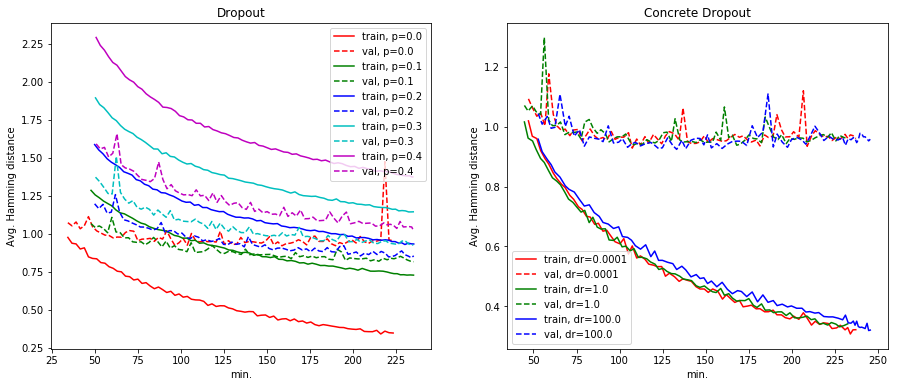

In [18]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)

for training_data, dropout_prob, color in zip(dropout_training_datas,
                                              dropout_probs, ['r', 'g', 'b', 'c', 'm']):

    train_scores = [x[2] for x in training_data]
    val_scores = [x[4] for x in training_data]
    dropout_execution_times = [x[0] for x in training_data]

    plt.plot(dropout_execution_times[20:], train_scores[20:], color,
             label='train, p={}'.format(dropout_prob))
    plt.plot(dropout_execution_times[20:], val_scores[20:], color + '--',
             label='val, p={}'.format(dropout_prob))

plt.legend()
plt.xlabel('min.')
plt.ylabel('Avg. Hamming distance')
plt.title('Dropout')
    
plt.subplot(1, 2, 2)
    
for training_data, dr, color in zip(cdropout_models, cdropout_training_datas,
                                    cdropout_regs, ['r', 'g', 'b']):

    train_scores = [x[2] for x in training_data]
    val_scores = [x[4] for x in training_data]
    dropout_execution_times = [x[0] for x in training_data]

    plt.plot(dropout_execution_times[20:], train_scores[20:], color,
             label='train, dr={}'.format(dr))
    plt.plot(dropout_execution_times[20:], val_scores[20:], color + '--',
             label='val, dr={}'.format(dr))
    
plt.legend()
plt.xlabel('min.')
plt.ylabel('Avg. Hamming distance')
plt.title('Concrete Dropout')

plt.show()